<a href="https://www.kaggle.com/code/erinryan/pokestatsnotebook?scriptVersionId=153257090" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Importing libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
poke = pd.read_csv('/kaggle/input/poke-stats-pt2/Pokemon Stats - Pokemon Database-3.csv')

## Exploring the data and gettig a feel for it.

In [3]:
poke.head()

,Pokedex Number,Pokemon Id,Pokemon Name,Classification,Alternate Form Name,Legendary Type,Pokemon Height,Pokemon Weight,Primary Type,Secondary Type
0,1,1,"""Bulbasaur""","""Seed Pokémon""",NaN,NaN,0.7,6.9,"""Grass""","""Poison"""
1,2,2,"""Ivysaur""","""Seed Pokémon""",NaN,NaN,1.0,13.0,"""Grass""","""Poison"""
2,3,3,"""Venusaur""","""Seed Pokémon""",NaN,NaN,2.0,100.0,"""Grass""","""Poison"""
3,3,4,"""Venusaur""","""Seed Pokémon""","""Mega""",NaN,2.4,155.5,"""Grass""","""Poison"""
4,3,1526,"""Venusaur""","""Seed Pokémon""","""Gigantamax""",NaN,24.0,0.0,"""Grass""","""Poison"""


In [4]:
poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pokedex Number       1235 non-null   int64  
 1   Pokemon Id           1235 non-null   int64  
 2   Pokemon Name         1235 non-null   object 
 3   Classification       1235 non-null   object 
 4   Alternate Form Name  206 non-null    object 
 5   Legendary Type       139 non-null    object 
 6   Pokemon Height       1235 non-null   float64
 7   Pokemon Weight       1235 non-null   float64
 8   Primary Type         1235 non-null   object 
 9   Secondary Type       670 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 96.6+ KB


In [5]:
poke['Pokemon Height'].describe()

count    1235.000000
mean        2.099271
std         5.563404
min         0.100000
25%         0.600000
50%         1.100000
75%         1.600000
max       100.000000
Name: Pokemon Height, dtype: float64

In [6]:
poke['Pokemon Weight'].describe()

count    1235.000000
mean       71.567368
std       130.162521
min         0.000000
25%         8.000000
50%        29.500000
75%        75.000000
max       999.900000
Name: Pokemon Weight, dtype: float64

#### The Average Height of the 1235 pokemon caught is:
### ~About 2cm

#### The Average Weight of the 1235 pokemon caught is:
### ~About 72 kg

In [7]:
poke.isna().sum()

Pokedex Number            0
Pokemon Id                0
Pokemon Name              0
Classification            0
Alternate Form Name    1029
Legendary Type         1096
Pokemon Height            0
Pokemon Weight            0
Primary Type              0
Secondary Type          565
dtype: int64

#### ***Missing values in dataset are intentional as not all pokemon have an alternate form, Legendary Type, and/or some don't have a secondary type of element.***

In [8]:
poke.columns

Index(['Pokedex Number', 'Pokemon Id', 'Pokemon Name', 'Classification',
       'Alternate Form Name', 'Legendary Type', 'Pokemon Height',
       'Pokemon Weight', 'Primary Type', 'Secondary Type'],
      dtype='object')

In [9]:
poke.drop(['Pokedex Number', 'Pokemon Id','Classification', 'Alternate Form Name','Secondary Type'], axis=1, inplace=True)
poke.head()

,Pokemon Name,Legendary Type,Pokemon Height,Pokemon Weight,Primary Type
0,"""Bulbasaur""",NaN,0.7,6.9,"""Grass"""
1,"""Ivysaur""",NaN,1.0,13.0,"""Grass"""
2,"""Venusaur""",NaN,2.0,100.0,"""Grass"""
3,"""Venusaur""",NaN,2.4,155.5,"""Grass"""
4,"""Venusaur""",NaN,24.0,0.0,"""Grass"""


In [10]:
poke.groupby(['Primary Type', 'Legendary Type', 'Pokemon Name']).agg([sum])

Pokemon Height Pokemon Weight
                                                     sum            sum
Primary Type Legendary Type  Pokemon Name                              
"Bug"        "Mythical"      "Genesect"              1.5           82.5
             "Sub-Legendary" "Buzzwole"              2.4          333.6
                             "Pheromosa"             1.8           25.0
"Dark"       "Legendary"     "Yveltal"               5.8          203.0
             "Mythical"      "Darkrai"               1.5           50.5
...                                                  ...            ...
"Water"      "Mythical"      "Keldeo"                1.4           48.5
                             "Manaphy"               0.3            1.4
                             "Phione"                0.4            3.1
             "Sub-Legendary" "Suicune"               2.0          187.0
                             "Tapu Fini"             1.3           21.2

[102 rows x 2 columns]

In [11]:
#piechart should be best for this

In [12]:
poke['Legendary Type'].value_counts()

Legendary Type
"Sub-Legendary"    63
"Legendary"        46
"Mythical"         30
Name: count, dtype: int64

In [13]:
poke['Primary Type'].value_counts()

Primary Type
"Water"       154
"Normal"      132
"Grass"       111
"Bug"          94
"Psychic"      86
"Electric"     78
"Fire"         77
"Rock"         69
"Dark"         57
"Fighting"     57
"Ground"       49
"Dragon"       47
"Poison"       46
"Steel"        46
"Ghost"        44
"Ice"          44
"Fairy"        33
"Flying"       11
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7d348b22b3d0>,
 [Text(0.16101924037078222, 1.0881510943937962, 'Legendary'),
  Text(-0.8079656864531021, -0.7464525768689984, 'Mythical'),
  Text(0.8566828854366002, -0.6899959665099653, 'Sub-Legendary')])

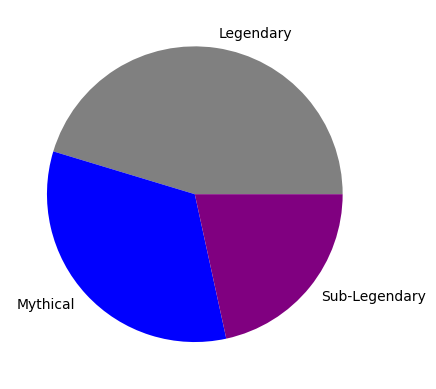

In [14]:
labels = 'Legendary', 'Mythical','Sub-Legendary'
sizes = [63,46,30]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,
       colors=['gray', 'blue', 'purple'])

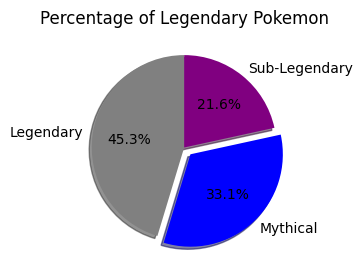

In [15]:
explode = (0, 0.1, 0)  

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       colors = ['gray', 'blue', 'purple'], shadow=True, startangle=90)

ax.set_title("Percentage of Legendary Pokemon")

plt.show()

#### Based off of the 136 'Legendary Type' pokemon, 33.1%(46) are Legendary Pokemon, 45.3 are Sub-Legendary Pokemon, 33.1% are Mythical Pokemon

## 

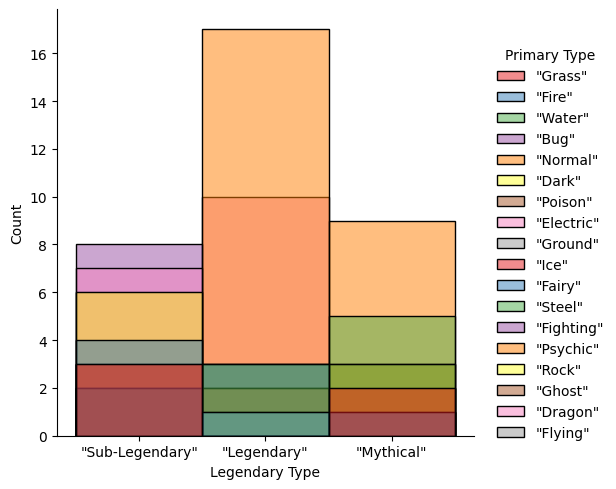

In [16]:
sns.displot(data=poke, x='Legendary Type', hue='Primary Type', palette='Set1')

## Sorting values based only on Legendary Type of Pokemon Caught

In [17]:
poke_sorted = poke.sort_values('Legendary Type')

In [18]:
poke_sorted.head(139) # I did cheat and stated with 141 just to make sure that I wasn't going to miss anything.

,Pokemon Name,Legendary Type,Pokemon Height,Pokemon Weight,Primary Type
885,"""Zygarde""","""Legendary""",5.0,305.0,"""Dragon"""
624,"""Giratina""","""Legendary""",4.5,750.0,"""Ghost"""
625,"""Giratina""","""Legendary""",6.9,650.0,"""Ghost"""
799,"""Reshiram""","""Legendary""",3.2,330.0,"""Dragon"""
800,"""Zekrom""","""Legendary""",2.9,345.0,"""Dragon"""
...,...,...,...,...,...
489,"""Latias""","""Sub-Legendary""",1.4,40.0,"""Dragon"""
969,"""Tapu Fini""","""Sub-Legendary""",1.3,21.2,"""Water"""
968,"""Tapu Bulu""","""Sub-Legendary""",1.9,45.5,"""Grass"""
989,"""Poipole""","""Sub-Legendary""",0.6,1.8,"""Poison"""


In [19]:
poke_sorted.shape

(1235, 5)

In [20]:
just_legendary = poke_sorted.dropna()
just_legendary

,Pokemon Name,Legendary Type,Pokemon Height,Pokemon Weight,Primary Type
885,"""Zygarde""","""Legendary""",5.0,305.0,"""Dragon"""
624,"""Giratina""","""Legendary""",4.5,750.0,"""Ghost"""
625,"""Giratina""","""Legendary""",6.9,650.0,"""Ghost"""
799,"""Reshiram""","""Legendary""",3.2,330.0,"""Dragon"""
800,"""Zekrom""","""Legendary""",2.9,345.0,"""Dragon"""
...,...,...,...,...,...
489,"""Latias""","""Sub-Legendary""",1.4,40.0,"""Dragon"""
969,"""Tapu Fini""","""Sub-Legendary""",1.3,21.2,"""Water"""
968,"""Tapu Bulu""","""Sub-Legendary""",1.9,45.5,"""Grass"""
989,"""Poipole""","""Sub-Legendary""",0.6,1.8,"""Poison"""


In [21]:
just_legendary.shape

(139, 5)

In [22]:
just_legendary.describe()

,Pokemon Height,Pokemon Weight
count,139.000000,139.000000
mean,3.787050,201.129496
std,9.319816,252.212401
min,0.100000,0.000000
25%,1.400000,30.400000
50%,1.900000,100.500000
75%,3.400000,255.000000
max,100.000000,999.900000


### Of the 139 Legendary Type Pokemon, the average weight is: aprox: 201.13 kg, the minimum being .10 kg and the max being 999

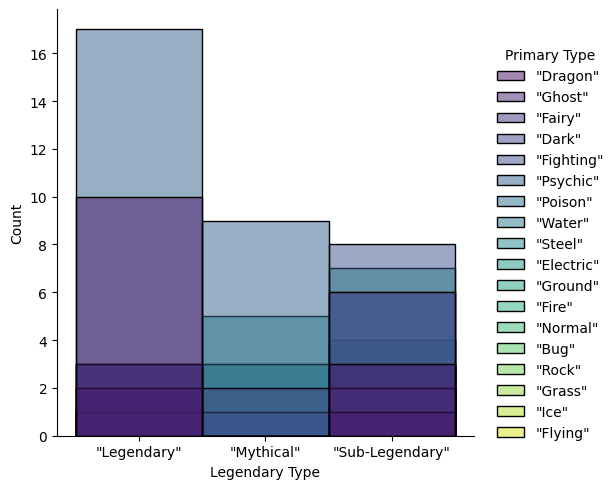

In [23]:
sns.displot(data=just_legendary, x='Legendary Type', hue='Primary Type', palette='viridis')

In [24]:
just_legendary['Primary Type'].value_counts()

Primary Type
"Psychic"     32
"Dragon"      13
"Fighting"    12
"Steel"        9
"Electric"     9
"Dark"         9
"Water"        8
"Fire"         6
"Normal"       6
"Rock"         6
"Fairy"        5
"Grass"        5
"Poison"       4
"Ground"       4
"Ghost"        3
"Bug"          3
"Ice"          3
"Flying"       2
Name: count, dtype: int64

In [25]:
just_legendary.groupby(['Primary Type', 'Legendary Type', 'Pokemon Name']).sum()

Pokemon Height  Pokemon Weight
Primary Type Legendary Type  Pokemon Name                                
"Bug"        "Mythical"      "Genesect"               1.5            82.5
             "Sub-Legendary" "Buzzwole"               2.4           333.6
                             "Pheromosa"              1.8            25.0
"Dark"       "Legendary"     "Yveltal"                5.8           203.0
             "Mythical"      "Darkrai"                1.5            50.5
...                                                   ...             ...
"Water"      "Mythical"      "Keldeo"                 1.4            48.5
                             "Manaphy"                0.3             1.4
                             "Phione"                 0.4             3.1
             "Sub-Legendary" "Suicune"                2.0           187.0
                             "Tapu Fini"              1.3            21.2

[102 rows x 2 columns]

##### species = ('Psychic', 'Dragon', 'Fighting', 'Steel', 'Electric','Dark', 'Water','Fire', ' Normal','Rock', 'Fairy', 'Grass', 'Posion', 'Ground', 'Ghost', "Bug", "Ice", "Flying")
legendary_type = {
    'Legendary': (46),
    'Mythical': (30),
    'Sub-Legendary': (63)}

x = np.arange(len([species]))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in legendary_type.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Pokemon')
ax.set_title('Primary Types of Legendary Type Pokemon')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=18)
ax.set_ylim(0, 250)

plt.show()

In [26]:
#The conculsion will be presented soon